<a href="https://colab.research.google.com/github/nhatvitink3/IS353.P12_Group6/blob/main/Technology/Build_MXH_v%C3%A0_Th%E1%BB%B1c_nghi%E1%BB%87m_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import thư viện cần thiết

In [ ]:
import pandas as pd                  # Để xử lý dữ liệu, merge các bảng
from sklearn.model_selection import train_test_split  # Để chia dữ liệu thành tập train/test
from sklearn.ensemble import RandomForestClassifier   # Để thực hiện phân loại và chọn đặc trưng
from sklearn.metrics import accuracy_score            # Để đánh giá độ chính xác của mô hình (nếu cần)
import numpy as np
from sklearn.preprocessing import LabelEncoder
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Xây dựng mạng xã hội

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Dataset/CombinedDataset/RFC_beforeEncode_df.xlsx')
data

,mssv,dtb1,dtb2,dtb3,dtb4,drl1,drl2,drl3,drl4,sotc_tichluy,diem_tt,phanvung_diachi,slvp,khoa,hedt,xeploai
0,00046394XPvAibaEXe+fmxcqgvribEcT4YmJhSFD,6.743333,7.340000,7.975,7.360000,78.5,83.0,74.0,67.0,147,27.00,Đồng bằng sông Cửu Long,0,KTMT,CQUI,Khá
1,005D6433XPvAibaEXe9JJ0DEqozv6JkD0BJUpbna,7.470000,7.935000,8.760,8.325000,71.5,87.5,88.0,96.0,148,23.50,Đông Nam Bộ,0,MMT&TT,KSTN,Giỏi
2,006B0A45XPvAibaEXe+TZKE2gC8nUj96gTN+8Bxy,6.940000,7.575000,8.115,7.855000,75.5,76.0,71.0,77.5,148,27.00,Đông Nam Bộ,0,MMT&TT,CQUI,Khá
3,00A65C83XPvAibaEXe+BUGeEgVnB4GtsCU49A5+8,6.255000,5.376667,7.530,6.763333,82.0,54.0,86.0,80.5,141,24.25,Bắc Trung Bộ,0,KTTT,CQUI,TB Khá
4,00AD2952XPvAibaEXe/45+b0LBlJ7GBrgcGKBM3K,6.756667,6.650000,6.765,6.465000,75.0,72.0,77.5,76.5,149,22.25,Đông Nam Bộ,0,KTMT,CLC,TB Khá
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1826,FF5BFE8AXPvAibaEXe9ysTifnGoMwSIhZIOZGH/s,5.496667,6.145000,5.990,6.650000,78.0,70.0,79.0,69.5,147,26.00,Nam Trung Bộ,0,KTMT,CQUI,TB Khá
1827,FF601AFCXPvAibaEXe93PEySAJOVk+OR7t0UZryF,6.195000,7.440000,7.805,8.130000,100.0,90.5,93.0,75.0,143,24.50,Nam Trung Bộ,0,KTTT,CQUI,Khá
1828,FF8D99CCXPvAibaEXe+D5C9Re7EGLbLZvNjN8yi5,6.665000,7.000000,6.670,7.760000,65.0,82.5,80.0,77.5,147,20.25,Đồng bằng sông Hồng,0,KTMT,CLC,Khá
1829,FFE9E452XPvAibaEXe+6MN9FoW2mqXtx1lMTF9+D,8.175000,8.295000,7.830,7.955000,98.0,90.0,88.5,74.5,148,28.50,Đồng bằng sông Cửu Long,0,MMT&TT,CQUI,Giỏi


In [ ]:
sv = pd.read_excel('/content/drive/MyDrive/Dataset/CleanedDataset/01.sinhvien.xlsx')
sv

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,id,masv_thamsodau,mssv,namsinh,gioitinh,noisinh,lopsh,khoa,hedt,khoahoc,chuyennganh2,diachi_tinhtp,phanvung_diachi
0,1,13,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,1995,1,TP. Hồ Chí Minh,KTPM0001,CNPM,CQUI,8,D480103,TP. Hồ Chí Minh,Đông Nam Bộ
1,2,13,2420ED57XPvAibaEXe/Lh6v1XxTKJa6JLFRUPkLM,1995,1,Đồng Tháp,HTTT0001,HTTT,CTTT,8,D480104,TP. Hồ Chí Minh,Đông Nam Bộ
2,3,13,83B76C01XPvAibaEXe/lOccskaOiO2K46r7t4qnt,1994,1,Ninh Bình,KHMT2013,KHMT,CQUI,8,D480101,Hà Nam,Đồng bằng sông Hồng
3,4,13,91F785ABXPvAibaEXe/lOccskaOiO5y4GbVvuRQu,1995,1,TP. Hồ Chí Minh,HTTT0001,HTTT,CTTT,8,D480104,TP. Hồ Chí Minh,Đông Nam Bộ
4,5,13,007C275DXPvAibaEXe+TFgEDwYNnveOOmOYeYzF6,1995,1,TP. Hồ Chí Minh,MMTT0001,MMT&TT,CQUI,8,D480201,TP. Hồ Chí Minh,Đông Nam Bộ
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8290,19283,18,7D7633B0XPvAibaEXe95IhrkYSGfcCQVGm4nFGyt,2000,1,An Giang,MMCL2019.2,MMT&TT,CLC,14,7480102,An Giang,Đồng bằng sông Cửu Long
8291,19284,19,AB431338XPvAibaEXe8xMCTZ03/BexWzDCyWVsT3,2001,1,Bình Thuận,KHMT2019,KHMT,CQUI,14,D480101,Bình Thuận,Nam Trung Bộ
8292,19285,19,75AD7B4AXPvAibaEXe8xMCTZ03/BewoGrWSt0ZXM,2001,1,Lâm Đồng,KHMT2019,KHMT,CQUI,14,D480101,Lâm Đồng,Tây Nguyên
8293,19345,19,CB263C18XPvAibaEXe8xMCTZ03/Be8yk40QWdPiR,2000,1,Bến Tre,CNTT2019,KTTT,CQUI,14,D480201,Bến Tre,Đồng bằng sông Cửu Long


In [ ]:
data=pd.merge(data,sv[['mssv', 'khoahoc']],on='mssv',how="left")
data

,mssv,dtb1,dtb2,dtb3,dtb4,drl1,drl2,drl3,drl4,sotc_tichluy,diem_tt,phanvung_diachi,slvp,khoa,hedt,xeploai,khoahoc
0,00046394XPvAibaEXe+fmxcqgvribEcT4YmJhSFD,6.743333,7.340000,7.975,7.360000,78.5,83.0,74.0,67.0,147,27.00,Đồng bằng sông Cửu Long,0,KTMT,CQUI,Khá,8
1,005D6433XPvAibaEXe9JJ0DEqozv6JkD0BJUpbna,7.470000,7.935000,8.760,8.325000,71.5,87.5,88.0,96.0,148,23.50,Đông Nam Bộ,0,MMT&TT,KSTN,Giỏi,11
2,006B0A45XPvAibaEXe+TZKE2gC8nUj96gTN+8Bxy,6.940000,7.575000,8.115,7.855000,75.5,76.0,71.0,77.5,148,27.00,Đông Nam Bộ,0,MMT&TT,CQUI,Khá,9
3,00A65C83XPvAibaEXe+BUGeEgVnB4GtsCU49A5+8,6.255000,5.376667,7.530,6.763333,82.0,54.0,86.0,80.5,141,24.25,Bắc Trung Bộ,0,KTTT,CQUI,TB Khá,10
4,00AD2952XPvAibaEXe/45+b0LBlJ7GBrgcGKBM3K,6.756667,6.650000,6.765,6.465000,75.0,72.0,77.5,76.5,149,22.25,Đông Nam Bộ,0,KTMT,CLC,TB Khá,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1826,FF5BFE8AXPvAibaEXe9ysTifnGoMwSIhZIOZGH/s,5.496667,6.145000,5.990,6.650000,78.0,70.0,79.0,69.5,147,26.00,Nam Trung Bộ,0,KTMT,CQUI,TB Khá,8
1827,FF601AFCXPvAibaEXe93PEySAJOVk+OR7t0UZryF,6.195000,7.440000,7.805,8.130000,100.0,90.5,93.0,75.0,143,24.50,Nam Trung Bộ,0,KTTT,CQUI,Khá,8
1828,FF8D99CCXPvAibaEXe+D5C9Re7EGLbLZvNjN8yi5,6.665000,7.000000,6.670,7.760000,65.0,82.5,80.0,77.5,147,20.25,Đồng bằng sông Hồng,0,KTMT,CLC,Khá,11
1829,FFE9E452XPvAibaEXe+6MN9FoW2mqXtx1lMTF9+D,8.175000,8.295000,7.830,7.955000,98.0,90.0,88.5,74.5,148,28.50,Đồng bằng sông Cửu Long,0,MMT&TT,CQUI,Giỏi,8


##Chuyển đổi sang chênh lệch THPT

In [ ]:

data["Average_THPT"] = data.groupby("khoahoc")["diem_tt"].transform("mean")

# 3. Tính mức độ chênh lệch
data["diem_tt2"] = data["diem_tt"] - data["Average_THPT"]

# 4. Hiển thị kết quả
print(data)


                                          mssv      dtb1      dtb2   dtb3  \
0     00046394XPvAibaEXe+fmxcqgvribEcT4YmJhSFD  6.743333  7.340000  7.975   
1     005D6433XPvAibaEXe9JJ0DEqozv6JkD0BJUpbna  7.470000  7.935000  8.760   
2     006B0A45XPvAibaEXe+TZKE2gC8nUj96gTN+8Bxy  6.940000  7.575000  8.115   
3     00A65C83XPvAibaEXe+BUGeEgVnB4GtsCU49A5+8  6.255000  5.376667  7.530   
4     00AD2952XPvAibaEXe/45+b0LBlJ7GBrgcGKBM3K  6.756667  6.650000  6.765   
...                                        ...       ...       ...    ...   
1826  FF5BFE8AXPvAibaEXe9ysTifnGoMwSIhZIOZGH/s  5.496667  6.145000  5.990   
1827  FF601AFCXPvAibaEXe93PEySAJOVk+OR7t0UZryF  6.195000  7.440000  7.805   
1828  FF8D99CCXPvAibaEXe+D5C9Re7EGLbLZvNjN8yi5  6.665000  7.000000  6.670   
1829  FFE9E452XPvAibaEXe+6MN9FoW2mqXtx1lMTF9+D  8.175000  8.295000  7.830   
1830  FFFA4234XPvAibaEXe+OhmjSj4XEzdTGgcTdT9fT  7.180000  7.450000  8.400   

          dtb4   drl1  drl2  drl3  drl4  sotc_tichluy  diem_tt  \
0     7.3

In [ ]:
data.to_excel('/content/drive/MyDrive/Dataset/CombinedDataset/df_final.xlsx',index=False)

##Phân loại các mức điểm trước khi xây dựng đồ thị

In [ ]:
df = pd.DataFrame(data)
#Về điểm trung bình thì chia ra làm 4 mức tương ứng với 4 xếp loại
def classify_dtb(dtb):
    if dtb < 6.5:
        return "TB Khá"
    elif 6.5 <= dtb < 8.0:
        return "Khá"
    elif 8.0 <= dtb < 9.0:
        return "Giỏi"
    else :
        return "Xuất sắc"
#Còn mức chênh lệch thì chia ra 5
def classify_diem_tt(diem_tt2):
    if diem_tt2 <= -2:
        return -2
    elif -2 < diem_tt2 < 0:
        return -1
    elif 0 <= diem_tt2 <= 2:
        return 1
    elif diem_tt2 > 2:
        return 2
    else :
          return 0

df["dtb2_Class"] = df["dtb2"].apply(classify_dtb)
df["diem_tt2_Class"] = df["diem_tt2"].apply(classify_diem_tt)


In [ ]:
df

,mssv,dtb1,dtb2,dtb3,dtb4,drl1,drl2,drl3,drl4,sotc_tichluy,...,phanvung_diachi,slvp,khoa,hedt,xeploai,khoahoc,Average_THPT,diem_tt2,dtb2_Class,diem_tt2_Class
0,00046394XPvAibaEXe+fmxcqgvribEcT4YmJhSFD,6.743333,7.340000,7.975,7.360000,78.5,83.0,74.0,67.0,147,...,Đồng bằng sông Cửu Long,0,KTMT,CQUI,Khá,8,26.658470,0.341530,Khá,1
1,005D6433XPvAibaEXe9JJ0DEqozv6JkD0BJUpbna,7.470000,7.935000,8.760,8.325000,71.5,87.5,88.0,96.0,148,...,Đông Nam Bộ,0,MMT&TT,KSTN,Giỏi,11,22.421756,1.078244,Khá,1
2,006B0A45XPvAibaEXe+TZKE2gC8nUj96gTN+8Bxy,6.940000,7.575000,8.115,7.855000,75.5,76.0,71.0,77.5,148,...,Đông Nam Bộ,0,MMT&TT,CQUI,Khá,9,27.484221,-0.484221,Khá,-1
3,00A65C83XPvAibaEXe+BUGeEgVnB4GtsCU49A5+8,6.255000,5.376667,7.530,6.763333,82.0,54.0,86.0,80.5,141,...,Bắc Trung Bộ,0,KTTT,CQUI,TB Khá,10,23.098253,1.151747,TB Khá,1
4,00AD2952XPvAibaEXe/45+b0LBlJ7GBrgcGKBM3K,6.756667,6.650000,6.765,6.465000,75.0,72.0,77.5,76.5,149,...,Đông Nam Bộ,0,KTMT,CLC,TB Khá,10,23.098253,-0.848253,Khá,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1826,FF5BFE8AXPvAibaEXe9ysTifnGoMwSIhZIOZGH/s,5.496667,6.145000,5.990,6.650000,78.0,70.0,79.0,69.5,147,...,Nam Trung Bộ,0,KTMT,CQUI,TB Khá,8,26.658470,-0.658470,TB Khá,-1
1827,FF601AFCXPvAibaEXe93PEySAJOVk+OR7t0UZryF,6.195000,7.440000,7.805,8.130000,100.0,90.5,93.0,75.0,143,...,Nam Trung Bộ,0,KTTT,CQUI,Khá,8,26.658470,-2.158470,Khá,-2
1828,FF8D99CCXPvAibaEXe+D5C9Re7EGLbLZvNjN8yi5,6.665000,7.000000,6.670,7.760000,65.0,82.5,80.0,77.5,147,...,Đồng bằng sông Hồng,0,KTMT,CLC,Khá,11,22.421756,-2.171756,Khá,-2
1829,FFE9E452XPvAibaEXe+6MN9FoW2mqXtx1lMTF9+D,8.175000,8.295000,7.830,7.955000,98.0,90.0,88.5,74.5,148,...,Đồng bằng sông Cửu Long,0,MMT&TT,CQUI,Giỏi,8,26.658470,1.841530,Giỏi,1


##Xây dựng MXH

In [ ]:
G = nx.Graph()

# Thêm các đỉnh với đặc trưng
for _, row in df.iterrows():
    G.add_node(
        row["mssv"],
        DTB=[row["dtb1"], row["dtb2_Class"], row["dtb3"], row["dtb4"]],
        DRL=[row["drl1"], row["drl2"], row["drl3"], row["drl4"]],
        diem_tt=row["diem_tt2_Class"],
        slvp=row["slvp"],
        khoa=row["khoa"],
        hedt=row["hedt"]
    )

# Thêm các cạnh dựa trên điều kiện
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        student_i = df.iloc[i]
        student_j = df.iloc[j]

        # Điều kiện để kết nối hai sinh viên
        if (
            student_i["dtb2_Class"] == student_j["dtb2_Class"]
            or (student_i["slvp"] >0 and student_j["slvp"]>0)
            or student_i["diem_tt"] == student_j["diem_tt"]
        ):
            G.add_edge(student_i["mssv"], student_j["mssv"])



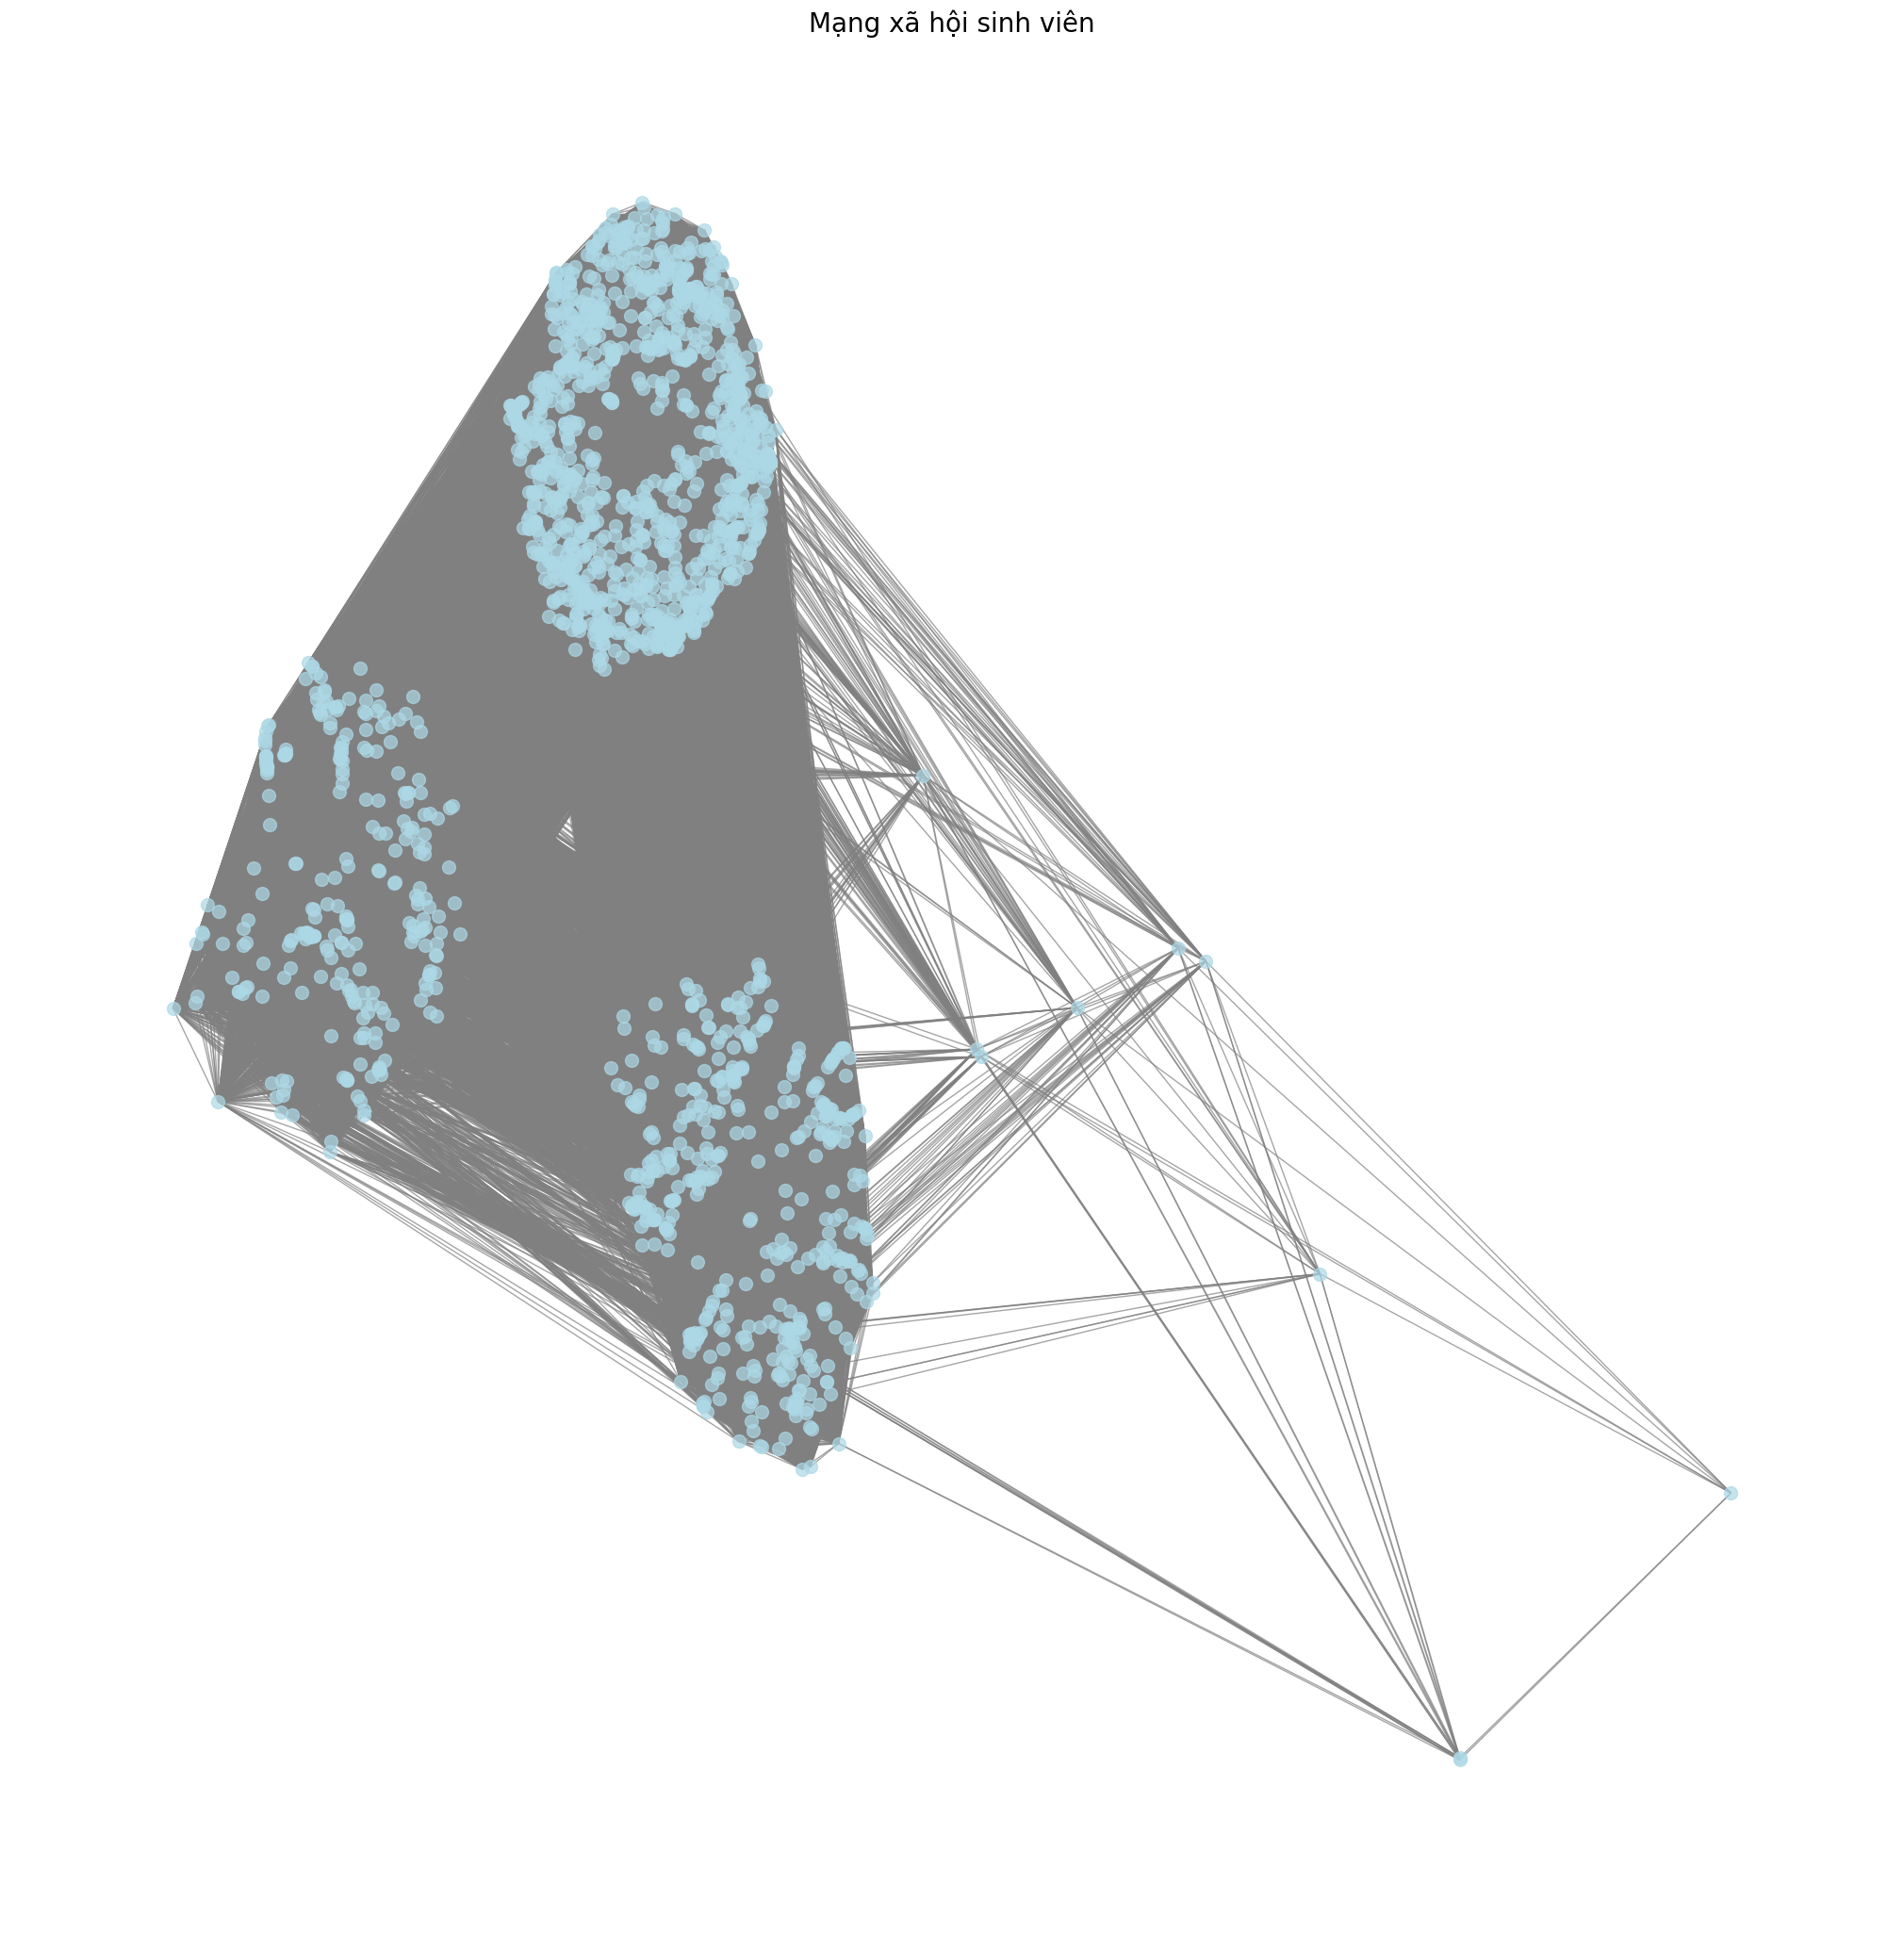

In [ ]:
plt.figure(figsize=(20, 20))
nx.draw(
    G,
    pos,
    with_labels=False,  # Không hiển thị nhãn
    node_size=100,       # Kích thước node nhỏ hơn để tránh rối
    node_color="lightblue",
    edge_color="gray",
    alpha=0.7           # Làm mờ cạnh để giảm độ rối
)
plt.title("Mạng xã hội sinh viên", fontsize=20)
plt.show()


##Phân cụm Louvain

In [ ]:
import community as community_louvain  # Thư viện Louvain

# Phân cụm Louvain
partition = community_louvain.best_partition(G)

# Kết quả phân cụm là dictionary {node: cluster_label}
print("Phân cụm Louvain:", partition)

# Chuyển nhãn phân cụm thành DataFrame
df["Louvain_Label"] = df["mssv"].map(partition)

# In DataFrame với nhãn cụm
print(df[["mssv", "Louvain_Label"]].head())


Phân cụm Louvain: {'00046394XPvAibaEXe+fmxcqgvribEcT4YmJhSFD': 1, '005D6433XPvAibaEXe9JJ0DEqozv6JkD0BJUpbna': 1, '006B0A45XPvAibaEXe+TZKE2gC8nUj96gTN+8Bxy': 1, '00A65C83XPvAibaEXe+BUGeEgVnB4GtsCU49A5+8': 2, '00AD2952XPvAibaEXe/45+b0LBlJ7GBrgcGKBM3K': 1, '00BCE333XPvAibaEXe9upvU5DvuC9h+K5WaA2XCn': 2, '00DC581CXPvAibaEXe9KG2OR8ZVK3umWFpCcHAl6': 2, '011201F7XPvAibaEXe+OhmjSj4XEzZe7iRZlaaxm': 1, '0113B184XPvAibaEXe+TFgEDwYNnvZZmdVYGpoeH': 1, '0155D7F9XPvAibaEXe+RaLErOlzghWNFVX9jT8kn': 0, '01B2E0C0XPvAibaEXe+LbmSTUWVMuCiA7Fe9lwmP': 1, '02C4644FXPvAibaEXe+wmtNhlfgIwhu0VSXU3tYN': 1, '0349C6B8XPvAibaEXe80b1fr0fH/JkdDh3dWSII8': 1, '035AEF81XPvAibaEXe/y2t7DVG8TDXVGQmvbKE12': 2, '0375F69FXPvAibaEXe9JdUmjPcaT8kzHYZ2eSjwX': 1, '03B1BF87XPvAibaEXe83EtiN4MI2ns5qclkPljKC': 1, '03CB8DC4XPvAibaEXe+4XPPXlKRz0LWy5kJsvBRv': 2, '03ECE99EXPvAibaEXe8NoNh54Mn6M+2xXKb+BCMr': 1, '03F181B0XPvAibaEXe+7uLWSh9XvQs9BhtrBVBeU': 1, '0402B932XPvAibaEXe9xHju59ydahTjwi8JiBa4z': 1, '047B5CA3XPvAibaEXe8c53vaOKMxC239GQMYdXlR

In [ ]:
df.to_excel('/content/drive/MyDrive/Dataset/CombinedDataset/df_final_louvain.xlsx',index=False)

#***Random Forest Classifier***

In [ ]:
#Bảng df_final_louvain sau khi chuyển qua bên file chương 3 để merge với bảng đã mã hóa thì được
#file df_final_encoded
datafr=pd.read_excel('/content/drive/MyDrive/Dataset/CombinedDataset/df_final_encoded.xlsx')
datafr

,mssv,dtb1,dtb2,dtb3,dtb4,drl1,drl2,drl3,drl4,sotc_tichluy,diem_tt,xeploai_encoded,khoa_encoded,hedt_encoded,diem_tt2,Louvain_Label
0,00046394XPvAibaEXe+fmxcqgvribEcT4YmJhSFD,6.743333,7.340000,7.975,7.360000,78.5,83.0,74.0,67.0,147,27.00,1,0.902542,1.005988,0.341530,1
1,005D6433XPvAibaEXe9JJ0DEqozv6JkD0BJUpbna,7.470000,7.935000,8.760,8.325000,71.5,87.5,88.0,96.0,148,23.50,2,1.209354,1.725000,1.078244,1
2,006B0A45XPvAibaEXe+TZKE2gC8nUj96gTN+8Bxy,6.940000,7.575000,8.115,7.855000,75.5,76.0,71.0,77.5,148,27.00,1,1.209354,1.005988,-0.484221,1
3,00A65C83XPvAibaEXe+BUGeEgVnB4GtsCU49A5+8,6.255000,5.376667,7.530,6.763333,82.0,54.0,86.0,80.5,141,24.25,0,1.023622,1.005988,1.151747,2
4,00AD2952XPvAibaEXe/45+b0LBlJ7GBrgcGKBM3K,6.756667,6.650000,6.765,6.465000,75.0,72.0,77.5,76.5,149,22.25,0,0.902542,1.059761,-0.848253,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1826,FF5BFE8AXPvAibaEXe9ysTifnGoMwSIhZIOZGH/s,5.496667,6.145000,5.990,6.650000,78.0,70.0,79.0,69.5,147,26.00,0,0.902542,1.005988,-0.658470,2
1827,FF601AFCXPvAibaEXe93PEySAJOVk+OR7t0UZryF,6.195000,7.440000,7.805,8.130000,100.0,90.5,93.0,75.0,143,24.50,1,1.023622,1.005988,-2.158470,1
1828,FF8D99CCXPvAibaEXe+D5C9Re7EGLbLZvNjN8yi5,6.665000,7.000000,6.670,7.760000,65.0,82.5,80.0,77.5,147,20.25,1,0.902542,1.059761,-2.171756,1
1829,FFE9E452XPvAibaEXe+6MN9FoW2mqXtx1lMTF9+D,8.175000,8.295000,7.830,7.955000,98.0,90.0,88.5,74.5,148,28.50,2,1.209354,1.005988,1.841530,0


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# Dự đoán nhãn cho tập kiểm tra
X = datafr.drop(['mssv','xeploai_encoded','diem_tt2'], axis=1)
y = datafr['xeploai_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Khởi tạo và huấn luyện mô hình
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



# In báo cáo phân loại
print(classification_report(y_test, y_pred,digits=4))


              precision    recall  f1-score   support

           0     0.8431    0.8269    0.8350        52
           1     0.9318    0.9361    0.9339       219
           2     0.9271    0.9368    0.9319        95
           3     0.0000    0.0000    0.0000         1

    accuracy                         0.9183       367
   macro avg     0.6755    0.6750    0.6752       367
weighted avg     0.9155    0.9183    0.9169       367



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
feature_importances = model.feature_importances_

# Tạo DataFrame để hiển thị độ quan trọng của từng đặc trưng
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sắp xếp các đặc trưng theo độ quan trọng giảm dần
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df


,Feature,Importance
1,dtb2,0.199476
2,dtb3,0.169224
0,dtb1,0.161752
3,dtb4,0.130402
12,Louvain_Label,0.100511
6,drl3,0.042937
7,drl4,0.040217
5,drl2,0.034856
4,drl1,0.031019
9,diem_tt,0.029648


#***SVM***


In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Dataset/CombinedDataset/df_final_encoded.xlsx')
df

,mssv,dtb1,dtb2,dtb3,dtb4,drl1,drl2,drl3,drl4,sotc_tichluy,diem_tt,xeploai_encoded,khoa_encoded,hedt_encoded,diem_tt2,Louvain_Label
0,00046394XPvAibaEXe+fmxcqgvribEcT4YmJhSFD,6.743333,7.340000,7.975,7.360000,78.5,83.0,74.0,67.0,147,27.00,1,0.902542,1.005988,0.341530,1
1,005D6433XPvAibaEXe9JJ0DEqozv6JkD0BJUpbna,7.470000,7.935000,8.760,8.325000,71.5,87.5,88.0,96.0,148,23.50,2,1.209354,1.725000,1.078244,1
2,006B0A45XPvAibaEXe+TZKE2gC8nUj96gTN+8Bxy,6.940000,7.575000,8.115,7.855000,75.5,76.0,71.0,77.5,148,27.00,1,1.209354,1.005988,-0.484221,1
3,00A65C83XPvAibaEXe+BUGeEgVnB4GtsCU49A5+8,6.255000,5.376667,7.530,6.763333,82.0,54.0,86.0,80.5,141,24.25,0,1.023622,1.005988,1.151747,2
4,00AD2952XPvAibaEXe/45+b0LBlJ7GBrgcGKBM3K,6.756667,6.650000,6.765,6.465000,75.0,72.0,77.5,76.5,149,22.25,0,0.902542,1.059761,-0.848253,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1826,FF5BFE8AXPvAibaEXe9ysTifnGoMwSIhZIOZGH/s,5.496667,6.145000,5.990,6.650000,78.0,70.0,79.0,69.5,147,26.00,0,0.902542,1.005988,-0.658470,2
1827,FF601AFCXPvAibaEXe93PEySAJOVk+OR7t0UZryF,6.195000,7.440000,7.805,8.130000,100.0,90.5,93.0,75.0,143,24.50,1,1.023622,1.005988,-2.158470,1
1828,FF8D99CCXPvAibaEXe+D5C9Re7EGLbLZvNjN8yi5,6.665000,7.000000,6.670,7.760000,65.0,82.5,80.0,77.5,147,20.25,1,0.902542,1.059761,-2.171756,1
1829,FFE9E452XPvAibaEXe+6MN9FoW2mqXtx1lMTF9+D,8.175000,8.295000,7.830,7.955000,98.0,90.0,88.5,74.5,148,28.50,2,1.209354,1.005988,1.841530,0


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['mssv','xeploai_encoded','diem_tt2'])  # Các đặc trưng
X.fillna(X.mean(), inplace=True)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X)
y = df['xeploai_encoded']  # Nhãn phân loại
X_train, X_test, y_train, y_test = train_test_split(features_scaled, y, train_size=0.8,random_state=42)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
# Đánh giá hiệu quả của SVM
print(" Classification Report:")
print(classification_report(y_test, svm_predictions,digits=4))


 Classification Report:
              precision    recall  f1-score   support

           0     0.7800    0.7500    0.7647        52
           1     0.9128    0.9087    0.9108       219
           2     0.8990    0.9368    0.9175        95
           3     0.0000    0.0000    0.0000         1

    accuracy                         0.8910       367
   macro avg     0.6480    0.6489    0.6482       367
weighted avg     0.8879    0.8910    0.8893       367



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##Thử tinh chỉnh mô hình với GridSearchCV (Vì không hiệu quả nên quyết định không cho vào đồ án)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Định nghĩa các tham số cần tối ưu
param_grid = {
    'C': [0.1, 1, 10, 100],         # Các giá trị C
    'kernel': ['linear', 'rbf'],    # Các loại kernel
    'gamma': [1, 0.1, 0.01, 0.001]  # Các giá trị gamma cho kernel phi tuyến
}

# Khởi tạo mô hình SVC
svc = SVC()

# Khởi tạo GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
# Huấn luyện GridSearchCV
grid_search.fit(X_train, y_train)

# In ra các tham số tốt nhất
print("Best parameters found: ", grid_search.best_params_)

# In ra kết quả tốt nhất
print("Best cross-validation score: ", grid_search.best_score_)
# Dự đoán trên tập test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# In báo cáo phân loại
print("Classification Report:")
print(classification_report(y_test, y_pred,digits=4))


Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best parameters found:  {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Best cross-validation score:  0.881831782692038
Classification Report:
              precision    recall  f1-score   support

           0     0.8511    0.7143    0.7767        56
           1     0.8933    0.9220    0.9074       218
           2     0.8830    0.9121    0.8973        91
           3     1.0000    0.5000    0.6667         2

    accuracy                         0.8856       367
   macro avg     0.9068    0.7621    0.8120       367
weighted avg     0.8849    0.8856    0.8837       367



#***Thực nghiệm bổ sung***

##Trường hợp loại bỏ khoa và hedt

###RFC

In [ ]:
# Dự đoán nhãn cho tập kiểm tra
X = datafr.drop(['mssv','xeploai_encoded','diem_tt2','khoa_encoded','hedt_encoded'], axis=1)#,'Louvain_Label'
y = datafr['xeploai_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Khởi tạo và huấn luyện mô hình
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



# In báo cáo phân loại
print(classification_report(y_test, y_pred,digits=4))


              precision    recall  f1-score   support

           0     0.8600    0.8269    0.8431        52
           1     0.9324    0.9452    0.9388       219
           2     0.9368    0.9368    0.9368        95
           3     0.0000    0.0000    0.0000         1

    accuracy                         0.9237       367
   macro avg     0.6823    0.6772    0.6797       367
weighted avg     0.9208    0.9237    0.9222       367



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


###SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['mssv','xeploai_encoded','diem_tt2', "khoa_encoded", "hedt_encoded"])  # Các đặc trưng
X.fillna(X.mean(), inplace=True)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X)
y = df['xeploai_encoded']  # Nhãn phân loại
X_train, X_test, y_train, y_test = train_test_split(features_scaled, y, train_size=0.8,random_state=42)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
# Đánh giá hiệu quả của SVM
print(" Classification Report:")
print(classification_report(y_test, svm_predictions,digits=4))


 Classification Report:
              precision    recall  f1-score   support

           0     0.8298    0.7500    0.7879        52
           1     0.9148    0.9315    0.9231       219
           2     0.9175    0.9368    0.9271        95
           3     0.0000    0.0000    0.0000         1

    accuracy                         0.9046       367
   macro avg     0.6655    0.6546    0.6595       367
weighted avg     0.9010    0.9046    0.9024       367



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##Thử thách với 3 năm đầu

###RFC

####Chưa có MXH

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# Dự đoán nhãn cho tập kiểm tra
X = datafr.drop(['mssv','xeploai_encoded','diem_tt2','Louvain_Label','dtb4','drl4'], axis=1)
y = datafr['xeploai_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Khởi tạo và huấn luyện mô hình
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



# In báo cáo phân loại
print(classification_report(y_test, y_pred,digits=4))


              precision    recall  f1-score   support

           0     0.7647    0.7500    0.7573        52
           1     0.8879    0.9041    0.8959       219
           2     0.8925    0.8737    0.8830        95
           3     0.0000    0.0000    0.0000         1

    accuracy                         0.8719       367
   macro avg     0.6363    0.6319    0.6340       367
weighted avg     0.8692    0.8719    0.8705       367



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


####Đã áp dụng MXH

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# Dự đoán nhãn cho tập kiểm tra
X = datafr.drop(['mssv','xeploai_encoded','diem_tt2','dtb4','drl4'], axis=1)
y = datafr['xeploai_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Khởi tạo và huấn luyện mô hình
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



# In báo cáo phân loại
print(classification_report(y_test, y_pred,digits=4))


              precision    recall  f1-score   support

           0     0.7857    0.8462    0.8148        52
           1     0.9163    0.8995    0.9078       219
           2     0.8854    0.8947    0.8901        95
           3     0.0000    0.0000    0.0000         1

    accuracy                         0.8883       367
   macro avg     0.6469    0.6601    0.6532       367
weighted avg     0.8873    0.8883    0.8876       367



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
